In [1]:
#Generate vector embedding using tokenizer

In [2]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import io

In [3]:
embedding_dim = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [4]:
uploaded = files.upload()

Saving test_features.csv to test_features.csv
Saving train_features.csv to train_features.csv
Saving train_labels.csv to train_labels.csv


In [5]:
# turn a seq into clean tokens
def clean_seq(filename):
    seq_df = pd.read_csv(filename)
    sequences = seq_df['dna'].str.replace('[^ACGT]','N')
    for i in range(len(sequences)):
        sequences[i] = sequences[i].ljust(1058,'N')
    sequences_array = np.array(sequences)
    
    seq_list_truncated = []
    for i in range(len(sequences_array)):
        list_seq = list(sequences_array[i])
        del list_seq[750:]
        seq_list_truncated.append(''.join(list_seq))
    
    #print(np.array(seq_list_truncated).shape)
    
    token_list = []
    
    for i in range(len(seq_list_truncated)):
        List = [seq_list_truncated[i][m:m+6] for m in range(len(seq_list_truncated[i])-5)]
        token_list.append(List)
        
    return token_list

# load sequences and create token list
filename = "train_features.csv"
token_list = clean_seq(filename)

def load_labels(filename):
    df = pd.read_csv(filename)
    labels = df['labels']
    return labels

#load labels
filename = 'train_labels.csv'
labels = load_labels(filename)
softmax_layer = len(set(labels))

In [6]:
train_size = int(len(token_list) * training_portion)

train_seqs = token_list[:train_size]
train_labels = labels[:train_size]

validation_seqs = token_list[train_size:]
validation_labels = labels[train_size:]

In [7]:
print(np.array(token_list).shape)

print("Number of Unique label Ids:", len(set(labels)))
print(train_size)
print(train_seqs[0])
print(train_seqs[1])
print(train_seqs[10])
print(len(train_labels))
print(len(validation_seqs))
print(len(validation_labels))

(12906, 745)
Number of Unique label Ids: 1202
10324
['AACATT', 'ACATTA', 'CATTAT', 'ATTATA', 'TTATAC', 'TATACT', 'ATACTT', 'TACTTT', 'ACTTTA', 'CTTTAT', 'TTTATT', 'TTATTT', 'TATTTT', 'ATTTTC', 'TTTTCG', 'TTTCGG', 'TTCGGA', 'TCGGAG', 'CGGAGC', 'GGAGCA', 'GAGCAT', 'AGCATG', 'GCATGA', 'CATGAT', 'ATGATC', 'TGATCA', 'GATCAG', 'ATCAGG', 'TCAGGA', 'CAGGAA', 'AGGAAT', 'GGAATA', 'GAATAG', 'AATAGT', 'ATAGTA', 'TAGTAG', 'AGTAGG', 'GTAGGA', 'TAGGAA', 'AGGAAC', 'GGAACT', 'GAACTT', 'AACTTC', 'ACTTCA', 'CTTCAT', 'TTCATT', 'TCATTA', 'CATTAA', 'ATTAAG', 'TTAAGT', 'TAAGTA', 'AAGTAT', 'AGTATA', 'GTATAT', 'TATATT', 'ATATTA', 'TATTAA', 'ATTAAT', 'TTAATT', 'TAATTC', 'AATTCG', 'ATTCGA', 'TTCGAG', 'TCGAGC', 'CGAGCT', 'GAGCTG', 'AGCTGA', 'GCTGAA', 'CTGAAC', 'TGAACT', 'GAACTA', 'AACTAG', 'ACTAGG', 'CTAGGA', 'TAGGAA', 'AGGAAA', 'GGAAAT', 'GAAATC', 'AAATCC', 'AATCCT', 'ATCCTG', 'TCCTGG', 'CCTGGA', 'CTGGAG', 'TGGAGC', 'GGAGCA', 'GAGCAT', 'AGCATT', 'GCATTA', 'CATTAA', 'ATTAAT', 'TTAATT', 'TAATTG', 'AATTGG', 'ATTGGA

In [8]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_seqs)
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1

train_sequences = tokenizer.texts_to_sequences(train_seqs)
train_padded = pad_sequences(train_sequences, padding=padding_type)

max_length = len(train_padded[0])

print(train_padded.shape)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

(10324, 745)
745
745
745
745
745
745


In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_seqs)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

2582
(2582, 745)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
label_seq = le.transform(labels)

output = []
for v in label_seq:
    output.append([v])

print(output)
training_label_seq = np.array(output[:train_size])
validation_label_seq = np.array(output[train_size:])

[[31], [626], [1163], [30], [461], [450], [1164], [853], [626], [553], [780], [722], [643], [895], [44], [216], [364], [358], [1115], [1055], [384], [1012], [473], [372], [198], [858], [786], [248], [505], [220], [1085], [331], [647], [998], [1185], [714], [900], [152], [10], [614], [372], [370], [507], [321], [1099], [114], [213], [982], [15], [929], [734], [424], [540], [176], [226], [1161], [396], [550], [284], [680], [205], [586], [16], [462], [905], [372], [747], [1148], [641], [53], [822], [1035], [1054], [30], [673], [92], [1150], [461], [514], [959], [366], [444], [871], [848], [391], [1083], [4], [1176], [311], [881], [568], [513], [677], [11], [757], [1142], [997], [1166], [995], [747], [1162], [664], [32], [747], [643], [409], [734], [677], [67], [195], [599], [799], [416], [750], [877], [118], [793], [572], [532], [210], [555], [83], [617], [853], [479], [328], [693], [1200], [1200], [308], [584], [1150], [1172], [556], [468], [380], [524], [835], [686], [553], [809], [105]

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

history = model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 745, 100)          774400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 745, 100)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 743, 32)           9632      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 371, 32)           0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 371, 32)           128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 371, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 369, 64)          

In [17]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
323/323 - 5s - loss: 2.5207 - accuracy: 0.6586 - val_loss: 5.3365 - val_accuracy: 0.0201
Epoch 2/10
323/323 - 3s - loss: 0.1960 - accuracy: 0.9690 - val_loss: 0.2960 - val_accuracy: 0.9562
Epoch 3/10
323/323 - 3s - loss: 0.0789 - accuracy: 0.9882 - val_loss: 0.2279 - val_accuracy: 0.9679
Epoch 4/10
323/323 - 3s - loss: 0.0550 - accuracy: 0.9927 - val_loss: 0.2313 - val_accuracy: 0.9698
Epoch 5/10
323/323 - 3s - loss: 0.0642 - accuracy: 0.9929 - val_loss: 0.2177 - val_accuracy: 0.9706
Epoch 6/10
323/323 - 3s - loss: 0.0656 - accuracy: 0.9919 - val_loss: 0.2288 - val_accuracy: 0.9729
Epoch 7/10
323/323 - 3s - loss: 0.0422 - accuracy: 0.9956 - val_loss: 0.2685 - val_accuracy: 0.9717
Epoch 8/10
323/323 - 3s - loss: 0.0493 - accuracy: 0.9944 - val_loss: 0.2345 - val_accuracy: 0.9690
Epoch 9/10
323/323 - 3s - loss: 0.0700 - accuracy: 0.9911 - val_loss: 0.2525 - val_accuracy: 0.9671
Epoch 10/10
323/323 - 3s - loss: 0.0614 - accuracy: 0.9917 - val_loss: 0.2243 - val_accuracy: 0.9694

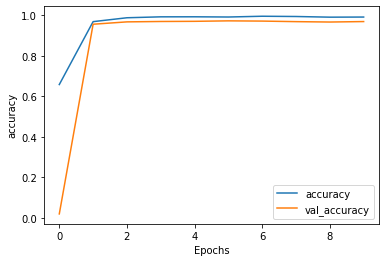

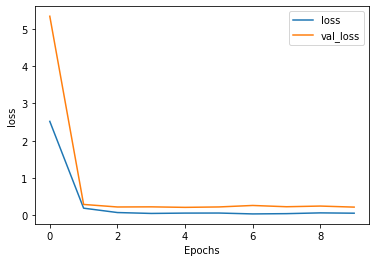

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
## Test prediction

In [ ]:
filename_features_test = 'test_features.csv'
test_seqs = clean_seq(filename_features_test)
test_sequences = tokenizer.texts_to_sequences(test_seqs)

predictions = np.argmax(model.predict(test_sequences), axis=1)
print(predictions)

def decode_labels(encoded_predict_labels, le):
    test_predictions = le.inverse_transform(encoded_predict_labels)
    
    return test_predictions

test_seq_predictions = decode_labels(predictions, le)
print(test_seq_predictions)

[ 659    7  200 ...   77 1059  590]
[ 667    8  205 ...   81 1071  597]


In [ ]:
def get_seq_ids(filename):
    df = pd.read_csv(filename)
    ids = df['id']
    
    return np.array(ids)

test_ids = get_seq_ids(filename_features_test)
print(test_ids)

frames = [pd.DataFrame(test_ids), pd.DataFrame(test_seq_predictions)]
output_data= np.concatenate(frames, axis=1)
output_df = pd.DataFrame(output_data)
output_df.to_csv('dna_barcode_seq_submission5_word_embedding_cnn.csv', index=False,  header=["id","labels"])

[   1    2    3 ... 8304 8305 8306]


In [ ]:
from google.colab import files
files.download("dna_barcode_seq_submission5_word_embedding_cnn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>